Detección de outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos un dataset con datos de exemplo: lonxitude de ríos, en millas
rios = pd.read_csv('../datasets/rios.csv',index_col=0)
rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


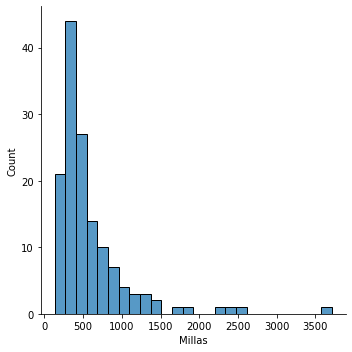

In [3]:
# Mostramos a distribución dos datos cun histograma
sns.displot(data=rios,x='Millas')

<AxesSubplot:xlabel='Millas'>

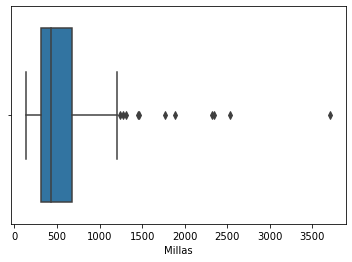

In [5]:
# Mostramos a distribución dos datos cun boxplot
# O "bigote" indica os percentís
# Os puntos que quedan fóra... son outliers?
sns.boxplot(data=rios,x='Millas')

In [6]:
# Consultamos estatísticos
rios.describe()

,Millas
count,141.000000
mean,591.184397
std,493.870842
min,135.000000
25%,310.000000
50%,425.000000
75%,680.000000
max,3710.000000


In [7]:
Q1 = rios.Millas.quantile(0.25)
Q3 = rios.Millas.quantile(0.75)
IQR = Q3 - Q1
mediana = rios.Millas.median()
minimo = rios.Millas.min()
maximo = rios.Millas.max()

print(f'minimo: {minimo}')
print(f'Q1: {Q1}')
print(f'mediana: {mediana}')
print(f'Q3: {Q3}')
print(f'máximo: {maximo}')
print(f'Rango intercuartílico: {IQR}')

minimo: 135
Q1: 310.0
mediana: 425.0
Q3: 680.0
máximo: 3710
Rango intercuartílico: 370.0


In [8]:
# Cálculo dos "bigotes"
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)

print(f'Bigote Inferior: {BI}')
print(f'Bigote Superior: {BS}')

Bigote Inferior: -245.0
Bigote Superior: 1235.0


In [9]:
# Os valores dos bigotes están limitados ao alcance dos valores mínimo e máximo, que non se poden exceder

In [10]:
# Os outliers serán os valores que están fóra do intervalo que definen os bigotes
outliers = rios[(rios.Millas < BI) | (rios.Millas > BS)].sort_values('Millas')
outliers

,Millas
Rio,
25,1243
98,1270
83,1306
23,1450
7,1459
141,1770
101,1885
69,2315
66,2348


In [11]:
# Creamos un novo Dataframe sen outliers
rios_sen_outliers = rios[(rios.Millas >= BI) & (rios.Millas <= BS)].sort_values('Millas')
rios_sen_outliers

,Millas
Rio,
8,135
17,202
108,210
39,210
129,215
...,...
121,1038
89,1054
114,1100


<AxesSubplot:xlabel='Millas'>

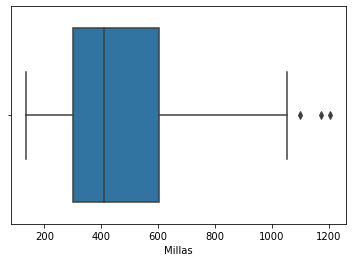

In [12]:
# Pintamos un novo boxplot
sns.boxplot(data=rios_sen_outliers,x='Millas')

In [13]:
# Poderíamos repetir o proceso ata que desaparezan os outliers completamente